# Twitter Sentiment Analysis

### What is Sentiment Analysis?

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

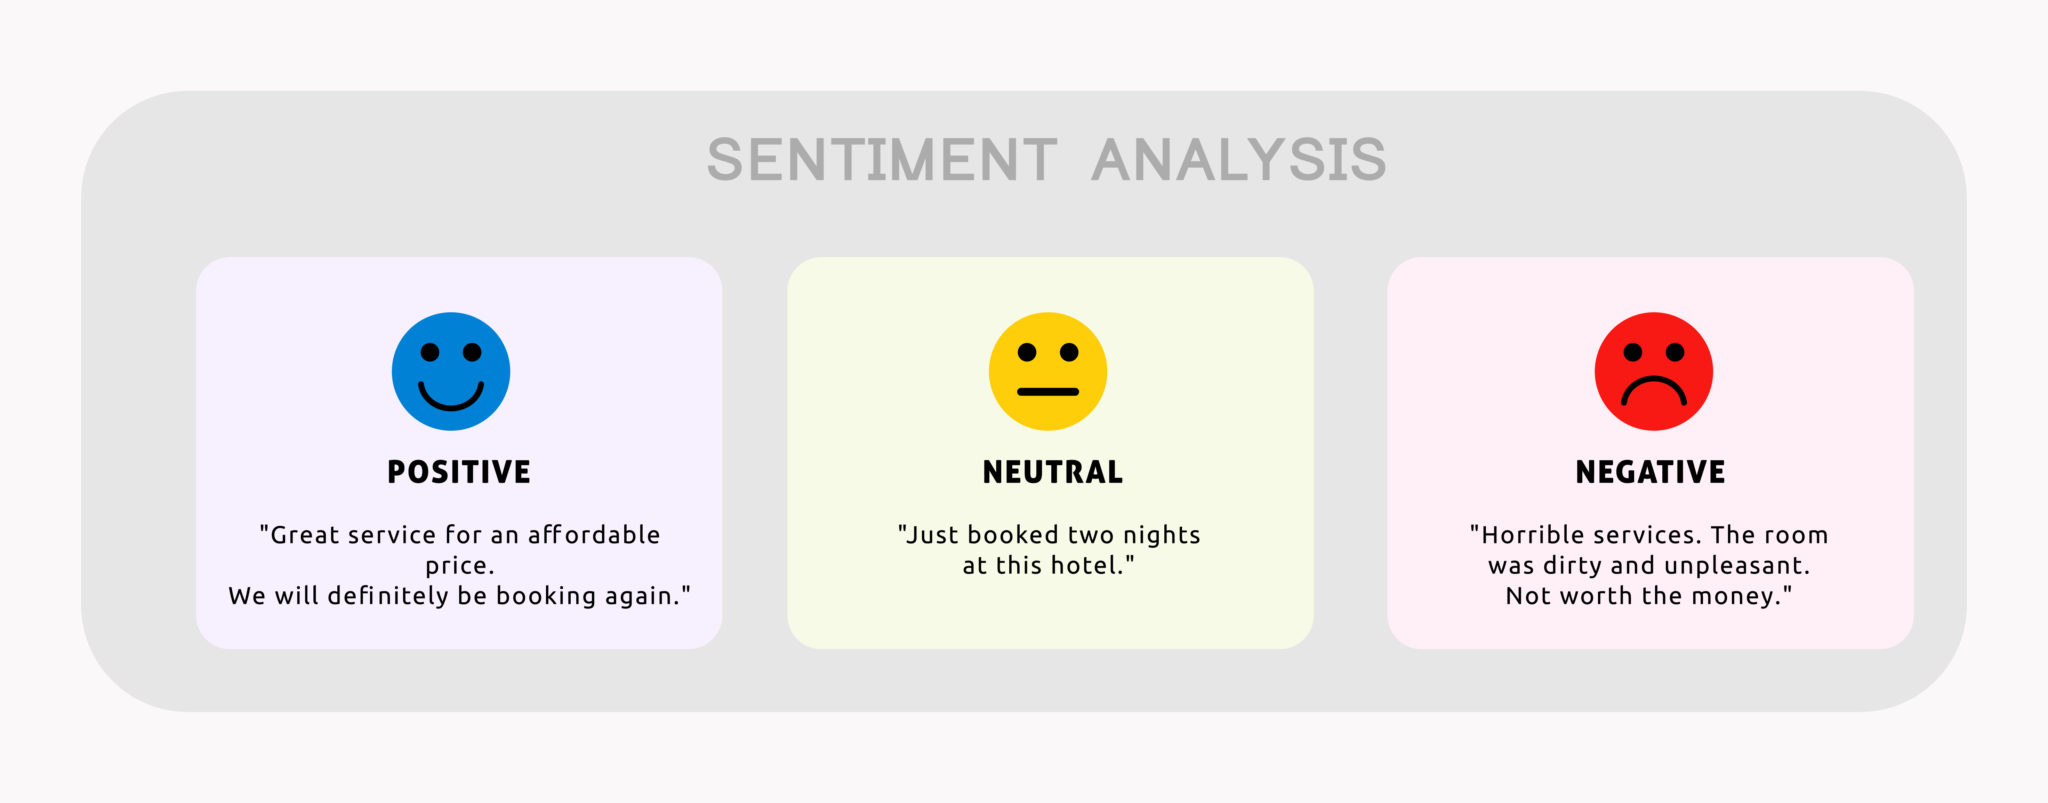

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('./data/twitter_sentiment.csv')

In [29]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [30]:
df = df.iloc[:,[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

In [31]:
df.head()

,sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75681 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [33]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [36]:
df = df[df['text'].apply(len)>1]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74646 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74646 non-null  object
 1   text       74646 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [38]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20843
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

<Axes: ylabel='count'>

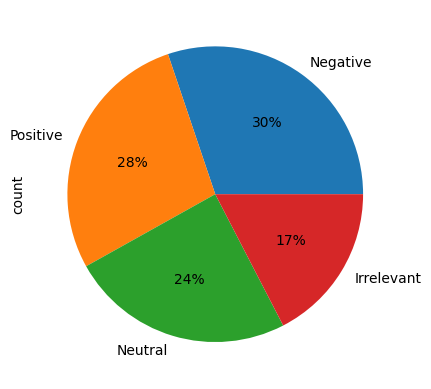

In [39]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%')

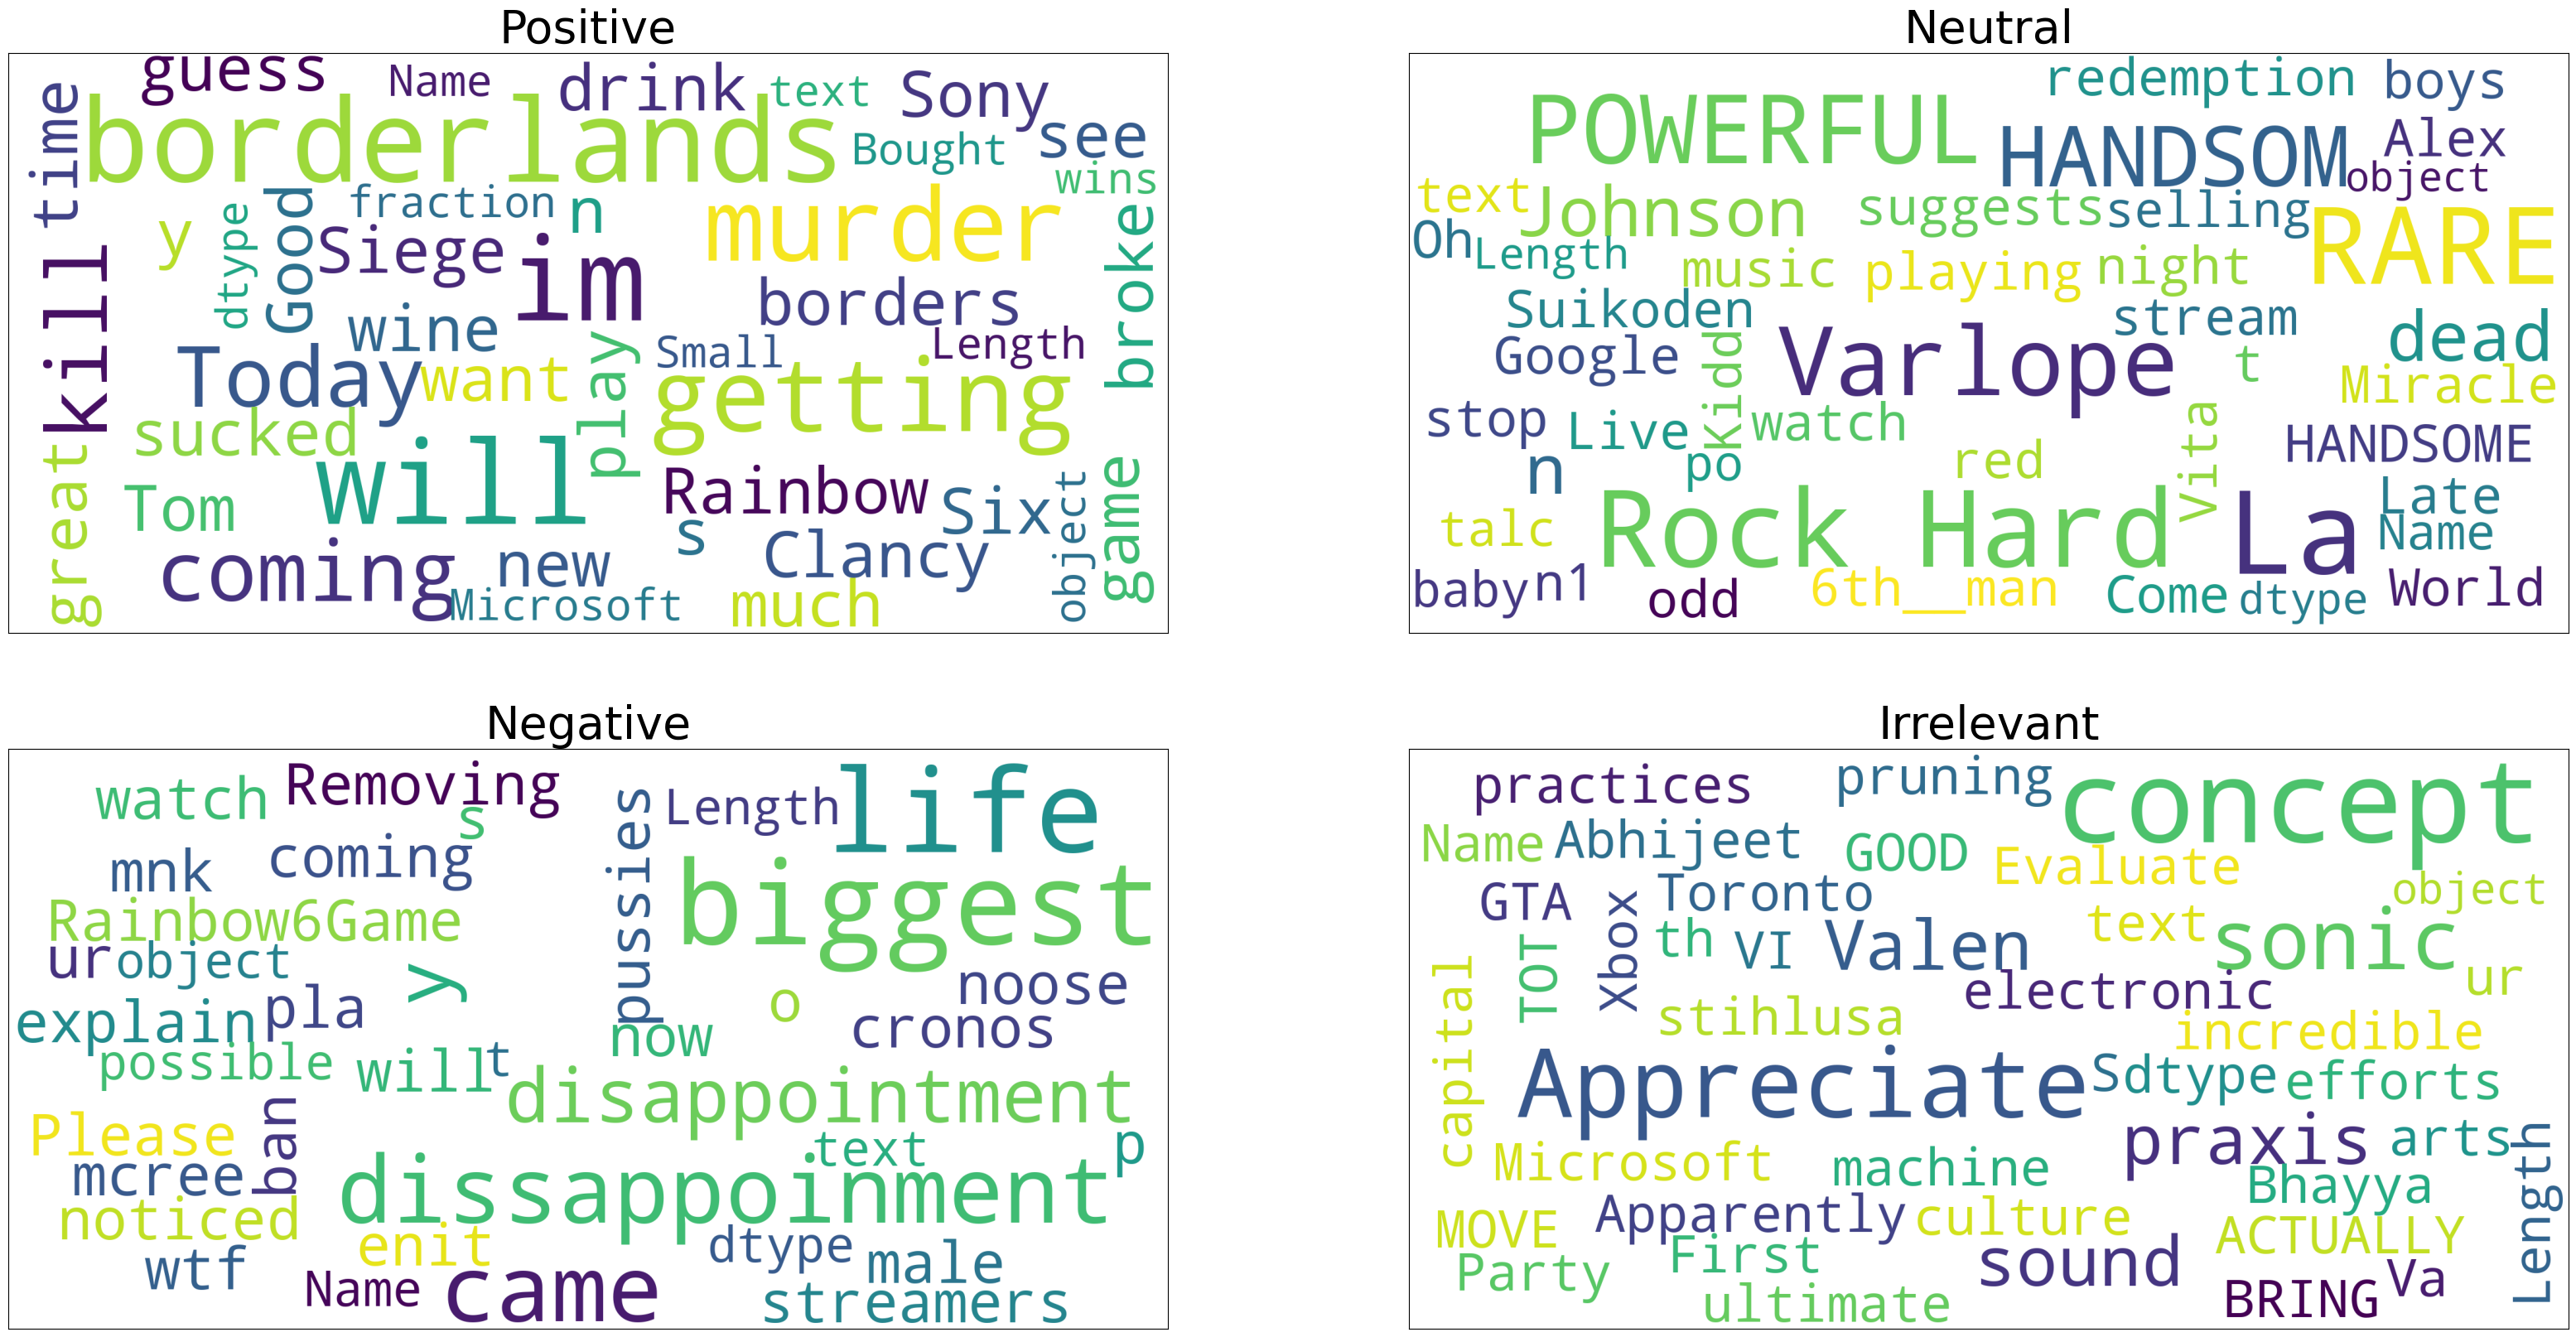

<Figure size 640x480 with 0 Axes>

In [40]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [41]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [42]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [43]:
df['text'] = df['text'].apply(cleanResume)

In [44]:
df.head()

,sentiment,text
0,Positive,i am coming to the borders and i will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [45]:
df['text'][2]

'im coming on borderlands and i will murder you all '

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['text'], df['sentiment'],test_size=0.2,random_state=42)

In [47]:
x_train.shape,x_test.shape 

((59716,), (14930,))

# Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

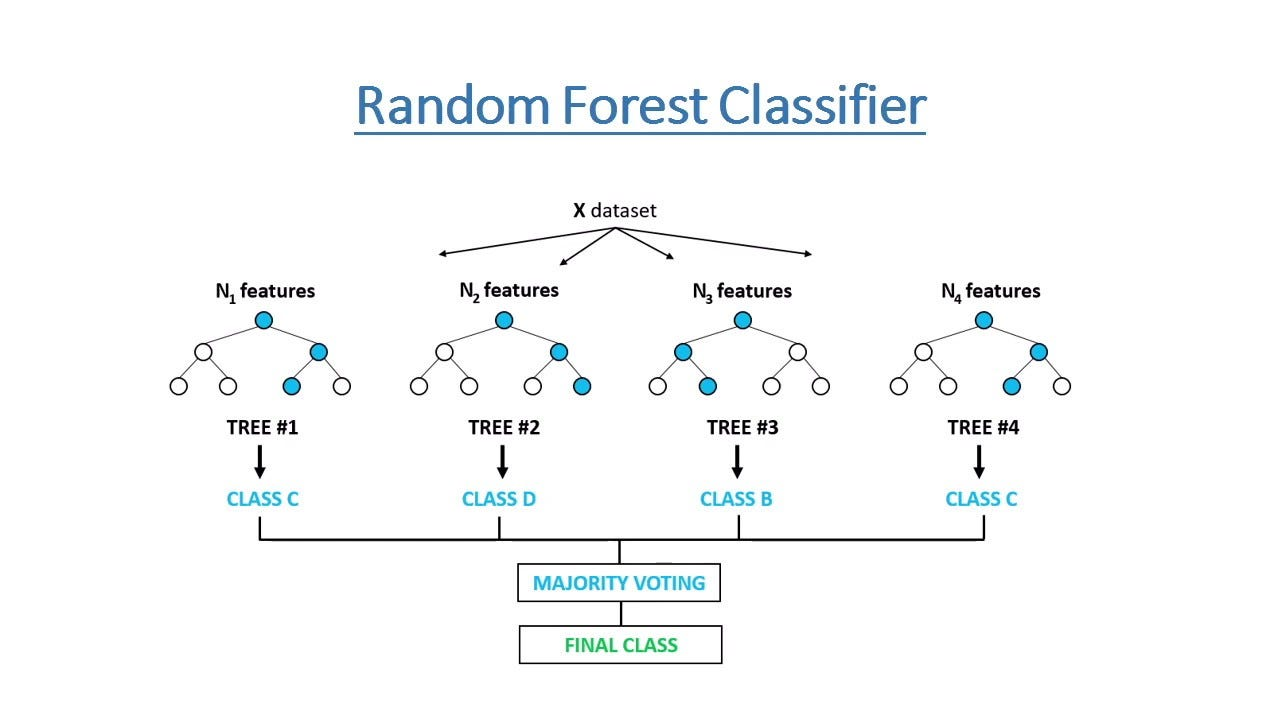

## Pros of Random Forest Classifier

- It is very accurate algorithm.
- It is robust to outliers and nonlinear data.
- It is highly scalable to any dataset size. It can handle large datasets.
- It can handle missing values efficiently.
- It can be used for feature selection.

## Cons of Random Forest Classifier

- It can be computationally expensive when you have a lot of trees.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')), 
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9112525117213663


In [52]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [54]:
x_test.tolist()[:10]

[' can you do a story on ea dice battlefield the mission state after over a year out and still no su ess none master balance no weapon balance bugs that has been there since launch and did they really listen to their listeners ',
 'this is one actually so sad ',
 'bill gates and microsoft banned in russia lesson from nigeria ',
 ' playapex my playstation was broken for almost two months and you guys somehow still have no nerves for the damn volt lmao',
 'mt inexplicable group behaviour that seems uncoordinated and had appeared also online e g in the cursed blood a ident epidemic on world of warcraft wearethemighty com warcraft corru ',
 ' internship manager ',
 'bgs broke dit in first hearthstone battlegrounds gameforce jp heartstone e3 ',
 'almost 2 years after the launch and about 1 cancelled 3d game later bfv 3 still doesn t have the name chauchat used in mp even though nowadays it s fully functional in the campaign touch beyond the touch wire putting one nail nail in the coffin ten